In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
sys.path.append('dynamic-coattention-network-plus')
sys.path.append('dynamic-coattention-network-plus/question_answering')
import tensorflow as tf 
from duplicate_questions.models.siamese_bilstm.siamese_bilstm import SiameseBiLSTM
from utils import get_data_paths
import numpy as np
import seaborn
from matplotlib import pyplot as plt
from question_answering.dataset import SquadDataset
from main import to_siamese, ImportModel
import json

/Users/Arnav/anaconda2/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Tensorflow Version ---------->  1.4.0


In [13]:
data_dir = 'dynamic-coattention-network-plus/data/squad'
embed_path = "dynamic-coattention-network-plus/data/squad/glove.trimmed.300.npz"
max_q_len = 40
max_p_len = 400
siamese_model_num = '04'
embeddings = np.load(embed_path)['glove']

In [3]:
# get config file for siamese model
siamese_config = 'paraphrase-id-tensorflow-master/logs/baseline_siamese/{}/trainparams.json'.format(siamese_model_num)
with open(siamese_config, 'r') as f:
    siamese_config = json.load(f)
    siamese_config['mode'] = 'test'
    siamese_config['input_sequence_length'] = 40
checkpoint_dir = 'paraphrase-id-tensorflow-master/models/baseline_siamese/{}/'.format(siamese_model_num)
siamese_graph = ImportModel(checkpoint_dir, siamese_config, embeddings)

INFO:duplicate_questions.models.base_tf_model:Building graph...


INFO:tensorflow:Restoring parameters from paraphrase-id-tensorflow-master/models/baseline_siamese/04/baseline_siamese-04-10


INFO:tensorflow:Restoring parameters from paraphrase-id-tensorflow-master/models/baseline_siamese/04/baseline_siamese-04-10


In [14]:
val_words_dir = data_dir + '/val.question'
with open(val_words_dir, 'r') as f:
    lines = f.readlines()
    all_questions = [x.split() for x in lines]
    pass

In [15]:
dev = SquadDataset(*get_data_paths(data_dir, name='val'),
                         max_question_length=max_q_len,
                         max_paragraph_length=max_p_len)

In [21]:
feed_dict_inputs = dev.get_batch(1, replace = False, shuffle = False)
question, paragraphs, question_lengths, paragraph_lengths, answers = feed_dict_inputs
M, m, A, a = siamese_graph.run(question)
question_words = all_questions[dev.epoch_sampled-1]
print('Question #' + str(dev.epoch_sampled))
print(question)
print(question_words)
print(question_lengths)


Question #3
([32, 821, 48, 954, 2757, 9, 1808, 25, 122, 50, 5, 12474, 23, 3028, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],)
['What', 'organization', 'did', 'Eisenhower', 'want', 'to', 'keep', 'from', 'being', 'one', 'of', 'McCarthy', "'s", 'targets', '?']
(15,)


In [22]:
A.shape

(1, 40, 40)

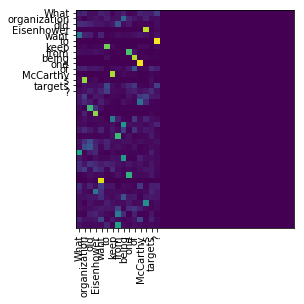

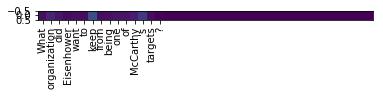

6


In [23]:
curtail = -1#len(question_words)
heat_map = A[0, :curtail, :curtail]
plt.imshow(heat_map, vmin=0, vmax=1.)
plt.xticks(np.arange(len(question_words)), question_words, rotation='vertical')
plt.yticks(np.arange(len(question_words)), question_words)
plt.show()

plt.imshow(a[0], vmin=0, vmax=1.)
plt.xticks(np.arange(len(question_words)), question_words, rotation='vertical')
plt.show()

print(np.argmax(a[0]))

In [20]:
print(np.sum(A[0], axis = 1))
#print(a[0])
print(np.sum(a[0], axis = 1))

[ 1.          1.          1.          1.          1.          1.          1.
  0.99999988  1.          1.          0.99999994  1.          1.          1.
  1.          1.00000012  1.          1.          1.          1.
  0.99999994  1.00000012  1.00000012  1.          1.          1.          1.
  1.          1.          1.          1.          1.00000012  0.99999994
  1.          1.          1.00000012  1.          1.          0.99999994
  1.00000012]
[ 0.99999994]
